<a href="https://colab.research.google.com/github/fred-lafleche/Exchange/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#imports
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plot
from sklearn.utils import resample
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from sklearn import svm
import numpy as np
import pandas as pd

In [ ]:
input_file = "/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv"
#10 numerical and 8 categorical attributes, where revenue is class label
#12330 rows and 18 columns
data = pd.read_csv(input_file)
data.head()
#print(data["VisitorType"][1000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Standardization, or mean removal and variance scaling

In [ ]:
# Normalization
# Numerical data: Administrative	Administrative_Duration	Informational	Informational_Duration	ProductRelated	ProductRelated_Duration	BounceRates	ExitRates	PageValues	SpecialDay	
#data = preprocessing.normalize(data["Administrative","Administrative_Duration"])
#Scaled data has zero mean and unit variance
dataArray = data.values
numericData = dataArray[:,[0,1,2,3,4,5,6,7,8,9]]
scaler = preprocessing.StandardScaler().fit(numericData)
scalledNumericData = scaler.transform(numericData)
print(scalledNumericData.mean(axis=0))
print(scalledNumericData.std(axis=0))

[-2.99661170e-17  6.33898629e-17 -4.61017185e-18 -2.07457733e-17
  4.61017185e-17 -1.01423781e-16 -5.99322340e-17  3.22712029e-17
  1.06033952e-16 -5.53220622e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# One hot encoding
# Categorical data: Month	OperatingSystems	Browser	Region	TrafficType	VisitorType	Weekend	Revenue
# OperatingSystems	Browser	Region	TrafficType are already converted to numbers
categoricalData = dataArray[:,[10,15,16]]
categoricalLabel = dataArray[:,[17]]
encoder1 = preprocessing.OneHotEncoder()
encoder2 = preprocessing.OneHotEncoder()
encoder1.fit(categoricalData)
encoder2.fit(categoricalLabel)
categoricalData=encoder1.transform(categoricalData).toarray()
categoricalLabel = encoder2.transform(categoricalLabel).toarray()
print(categoricalData)
print(categoricalLabel)
print(encoder1.categories_)
print(encoder2.categories_)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[array(['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'], dtype=object), array(['New_Visitor', 'Other', 'Returning_Visitor'], dtype=object), array([False, True], dtype=object)]
[array([False, True], dtype=object)]


In [ ]:
#join data back together
#data=np.concatenate((scalledNumericData, categoricalData))
data = np.column_stack((scalledNumericData, categoricalData))
#add back columns 11 to 14 and 17
data = np.column_stack((data, dataArray[:,[11,12,13,14]]))
print(data[0],"\nAnswer: ",categoricalLabel[0])


[-0.6969929641233985 -0.4571914023726529 -0.39647790101721353
 -0.24493050612963665 -0.6910031807070663 -0.6243475187901789
 3.667188794132383 3.229315594758881 -0.31717784430961626
 -0.3088213656157659 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 1 1 1 1] 
Answer:  [1. 0.]


In [ ]:
#Features(30): Administrative	Administrative_Duration	Informational	Informational_Duration	ProductRelated	ProductRelated_Duration	BounceRates	ExitRates	PageValues	SpecialDay	Aug Dec Feb July June Mar May Nov Oct Sept New_Visitor other returning_visitor, false true	OperatingSystems	Browser	Region	TrafficTyp	Revenue
# Feature selection
#todo
#label does not need both values, so we'll only keep the value for true
label = categoricalLabel[:,[1]]
print(label)
print(data[1],"\nAnswer: ",label[1])


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[-0.6969929641233985 -0.4571914023726529 -0.39647790101721353
 -0.24493050612963665 -0.66851798144781 -0.5909025573961064
 -0.45768299649364935 1.171472500128347 -0.31717784430961626
 -0.3088213656157659 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
 1.0 0.0 2 2 1 2] 
Answer:  [0.]


In [ ]:
#Divide data, 70% for training, 30% for testing
#12330 rows * 0.7 = 8631
training_data=data[0:8631]
training_label=label[0:8631]

testing_data=data[8631:12330]
testing_label=label[8631:12330]

print("Total number of lines:", len(training_data)+len(testing_data))

Total number of lines: 12330


# Single Decision Tree

In [ ]:
# single decision tree
SDT = tree.DecisionTreeClassifier()
SDT = SDT.fit(training_data,training_label)
SDTPred=SDT.predict(testing_data)
print(SDTPred)

[1. 0. 0. ... 0. 0. 1.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SDT=confusion_matrix(testing_label,SDTPred)
print("Confusion Matrix: \n",CM_SDT)
print(classification_report(testing_label,SDTPred))

Confusion Matrix: 
 [[2606  348]
 [ 380  365]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      2954
         1.0       0.51      0.49      0.50       745

    accuracy                           0.80      3699
   macro avg       0.69      0.69      0.69      3699
weighted avg       0.80      0.80      0.80      3699



ROC curve


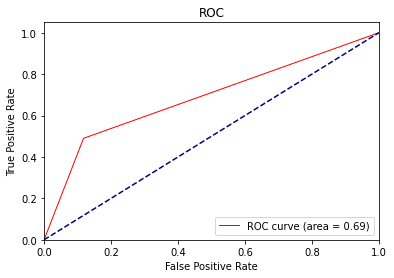

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,SDTPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()



# Random Forest

In [ ]:
# random forest
RF = RandomForestClassifier()
RF.fit(training_data,training_label)
RFPred = RF.predict(testing_data)
print(RFPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_RF=confusion_matrix(testing_label,RFPred)
print("Confusion Matrix: \n",CM_RF)
print(classification_report(testing_label,RFPred))

Confusion Matrix: 
 [[2845  109]
 [ 405  340]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2954
         1.0       0.76      0.46      0.57       745

    accuracy                           0.86      3699
   macro avg       0.82      0.71      0.74      3699
weighted avg       0.85      0.86      0.85      3699



ROC curve


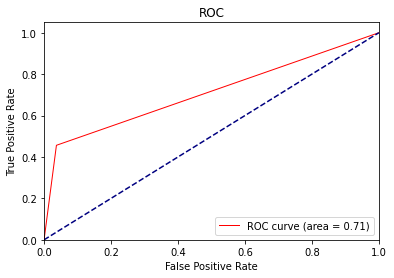

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,RFPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

# Support Vector Machine

In [ ]:
# support vector machine (svm)
s_v_m = svm.SVC()
s_v_m.fit(training_data,training_label)
s_v_mPred = s_v_m.predict(testing_data)
print(s_v_mPred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SVM=confusion_matrix(testing_label,s_v_mPred)
print("Confusion Matrix: \n",CM_SVM)
print(classification_report(testing_label,s_v_mPred))

Confusion Matrix: 
 [[2874   80]
 [ 515  230]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2954
         1.0       0.74      0.31      0.44       745

    accuracy                           0.84      3699
   macro avg       0.79      0.64      0.67      3699
weighted avg       0.83      0.84      0.81      3699



ROC curve


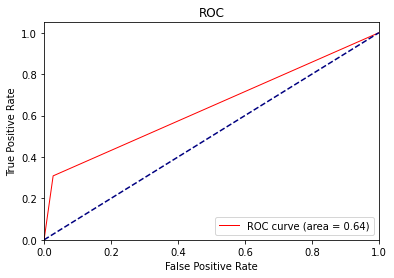

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,s_v_mPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

# K-nearest Neighbor

In [ ]:
# k-nearest neighbor (k-NN) default for k is 5
knn = KNeighborsClassifier()
knn.fit(training_data,training_label)
knnPred = knn.predict(testing_data)
print(knnPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_KNN=confusion_matrix(testing_label,knnPred)
print("Confusion Matrix: \n",CM_KNN)
print(classification_report(testing_label,knnPred))

Confusion Matrix: 
 [[2841  113]
 [ 539  206]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      2954
         1.0       0.65      0.28      0.39       745

    accuracy                           0.82      3699
   macro avg       0.74      0.62      0.64      3699
weighted avg       0.80      0.82      0.79      3699



ROC curve


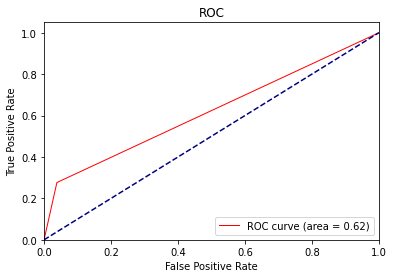

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,knnPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

# Oversample minority class

In [122]:
#Oversample minority class 
data_sparse = coo_matrix(training_data)
resample(training_data,data_sparse,training_label)

TypeError: ignored

## Single Decision Tree

In [ ]:
# single decision tree
SDT = tree.DecisionTreeClassifier()
SDT = SDT.fit(training_data,training_label)
SDTPred=SDT.predict(testing_data)
print(SDTPred)

[1. 0. 0. ... 0. 0. 1.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SDT=confusion_matrix(testing_label,SDTPred)
print("Confusion Matrix: \n",CM_SDT)
print(classification_report(testing_label,SDTPred))

Confusion Matrix: 
 [[2606  348]
 [ 380  365]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      2954
         1.0       0.51      0.49      0.50       745

    accuracy                           0.80      3699
   macro avg       0.69      0.69      0.69      3699
weighted avg       0.80      0.80      0.80      3699



ROC curve


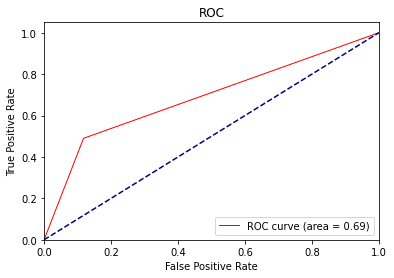

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,SDTPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()



## Random Forest

In [ ]:
# random forest
RF = RandomForestClassifier()
RF.fit(training_data,training_label)
RFPred = RF.predict(testing_data)
print(RFPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_RF=confusion_matrix(testing_label,RFPred)
print("Confusion Matrix: \n",CM_RF)
print(classification_report(testing_label,RFPred))

Confusion Matrix: 
 [[2845  109]
 [ 405  340]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2954
         1.0       0.76      0.46      0.57       745

    accuracy                           0.86      3699
   macro avg       0.82      0.71      0.74      3699
weighted avg       0.85      0.86      0.85      3699



ROC curve


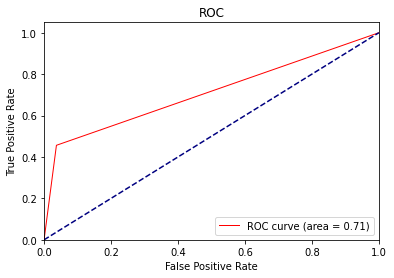

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,RFPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

## Support Vector Machine

In [ ]:
# support vector machine (svm)
s_v_m = svm.SVC()
s_v_m.fit(training_data,training_label)
s_v_mPred = s_v_m.predict(testing_data)
print(s_v_mPred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SVM=confusion_matrix(testing_label,s_v_mPred)
print("Confusion Matrix: \n",CM_SVM)
print(classification_report(testing_label,s_v_mPred))

Confusion Matrix: 
 [[2874   80]
 [ 515  230]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2954
         1.0       0.74      0.31      0.44       745

    accuracy                           0.84      3699
   macro avg       0.79      0.64      0.67      3699
weighted avg       0.83      0.84      0.81      3699



ROC curve


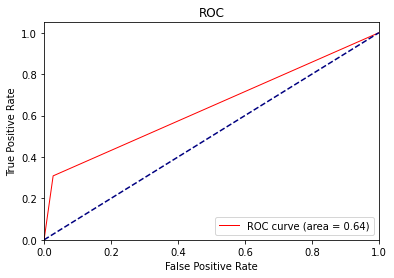

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,s_v_mPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

## K-nearest Neighbor

In [ ]:
# k-nearest neighbor (k-NN) default for k is 5
knn = KNeighborsClassifier()
knn.fit(training_data,training_label)
knnPred = knn.predict(testing_data)
print(knnPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_KNN=confusion_matrix(testing_label,knnPred)
print("Confusion Matrix: \n",CM_KNN)
print(classification_report(testing_label,knnPred))

Confusion Matrix: 
 [[2841  113]
 [ 539  206]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      2954
         1.0       0.65      0.28      0.39       745

    accuracy                           0.82      3699
   macro avg       0.74      0.62      0.64      3699
weighted avg       0.80      0.82      0.79      3699



ROC curve


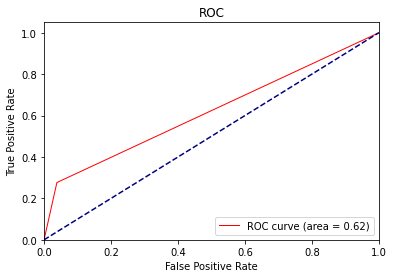

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,knnPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

# Undersample majority class

In [ ]:
#Undersample majority class --> ref: https://elitedatascience.com/imbalanced-classes

## Single Decision Tree

In [ ]:
# single decision tree
SDT = tree.DecisionTreeClassifier()
SDT = SDT.fit(training_data,training_label)
SDTPred=SDT.predict(testing_data)
print(SDTPred)

[1. 0. 0. ... 0. 0. 1.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SDT=confusion_matrix(testing_label,SDTPred)
print("Confusion Matrix: \n",CM_SDT)
print(classification_report(testing_label,SDTPred))

Confusion Matrix: 
 [[2606  348]
 [ 380  365]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      2954
         1.0       0.51      0.49      0.50       745

    accuracy                           0.80      3699
   macro avg       0.69      0.69      0.69      3699
weighted avg       0.80      0.80      0.80      3699



ROC curve


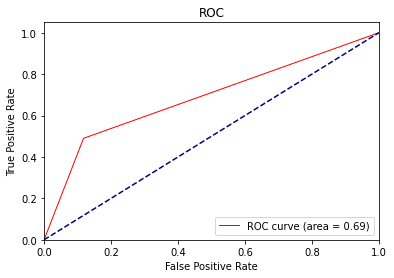

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,SDTPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()



## Random Forest

In [ ]:
# random forest
RF = RandomForestClassifier()
RF.fit(training_data,training_label)
RFPred = RF.predict(testing_data)
print(RFPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [109]:
#confusion matrix
CM_RF=confusion_matrix(testing_label,RFPred)
print("Confusion Matrix: \n",CM_RF)
print(classification_report(testing_label,RFPred))

Confusion Matrix: 
 [[2845  109]
 [ 405  340]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2954
         1.0       0.76      0.46      0.57       745

    accuracy                           0.86      3699
   macro avg       0.82      0.71      0.74      3699
weighted avg       0.85      0.86      0.85      3699



ROC curve


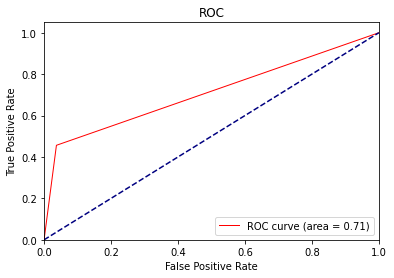

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,RFPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

## Support Vector Machine

In [ ]:
# support vector machine (svm)
s_v_m = svm.SVC()
s_v_m.fit(training_data,training_label)
s_v_mPred = s_v_m.predict(testing_data)
print(s_v_mPred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_SVM=confusion_matrix(testing_label,s_v_mPred)
print("Confusion Matrix: \n",CM_SVM)
print(classification_report(testing_label,s_v_mPred))

Confusion Matrix: 
 [[2874   80]
 [ 515  230]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2954
         1.0       0.74      0.31      0.44       745

    accuracy                           0.84      3699
   macro avg       0.79      0.64      0.67      3699
weighted avg       0.83      0.84      0.81      3699



ROC curve


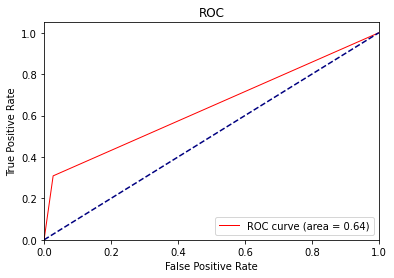

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,s_v_mPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()

## K-nearest Neighbor

In [ ]:
# k-nearest neighbor (k-NN) default for k is 5
knn = KNeighborsClassifier()
knn.fit(training_data,training_label)
knnPred = knn.predict(testing_data)
print(knnPred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0. 0. 0. ... 0. 0. 0.]


Confusion Matrix

In [ ]:
#confusion matrix
CM_KNN=confusion_matrix(testing_label,knnPred)
print("Confusion Matrix: \n",CM_KNN)
print(classification_report(testing_label,knnPred))

Confusion Matrix: 
 [[2841  113]
 [ 539  206]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      2954
         1.0       0.65      0.28      0.39       745

    accuracy                           0.82      3699
   macro avg       0.74      0.62      0.64      3699
weighted avg       0.80      0.82      0.79      3699



ROC curve


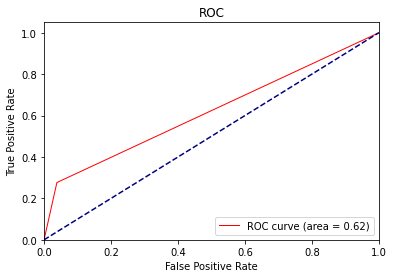

In [ ]:
#Roc curve (ref: https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(testing_label,knnPred)

roc_auc = auc(fpr, tpr)
plot.figure()
plot.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC')
plot.legend(loc="lower right")
plot.show()